In [15]:
import pylab as pl
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [62]:
C_range = 10.** np.arange(-3,3)
gamma_range = 10.**np.arange(-3,3)
param_grid = dict(gamma = gamma_range, C = C_range)
param_grid

{'C': array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
          1.00000000e+00,   1.00000000e+01,   1.00000000e+02]),
 'gamma': array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
          1.00000000e+00,   1.00000000e+01,   1.00000000e+02])}

In [63]:
grid = GridSearchCV(SVC(), param_grid=param_grid) #exhaustive search over specified parameter values for an estimator

In [64]:
class DataLoader:
    def __init__(self, path):
        self.path = path
        # print('in DataLoader')

    def loader(self):
        # print('Loading data.')
        file = pd.read_csv(self.path)
        # print('Finish loading')
        return file

In [65]:
#3. use LinearSVC with L2 C=0.01
selected_features =   ['Product_Info_1', 'Product_Info_4', 'Product_Info_5', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'InsuredInfo_2',
 'InsuredInfo_5', 'Insurance_History_2', 'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5', 'Medical_History_4',
 'Medical_History_5', 'Medical_History_17', 'Medical_History_18', 'Medical_History_20', 'Medical_History_26', 'Medical_History_27',
 'Medical_History_28', 'Medical_History_30', 'Medical_History_35', 'Medical_History_38', 'Medical_History_40', 'Medical_Keyword_3',
 'Medical_Keyword_6', 'Medical_Keyword_9', 'Medical_Keyword_12', 'Medical_Keyword_15', 'Medical_Keyword_35', 'Medical_Keyword_38',
 'Medical_Keyword_41', 'Medical_Keyword_45', 'Medical_Keyword_48', 'BMI_Ins_age']
data = DataLoader(path='C://Users/pc/Documents/SOTON/GitHub/adml_dataminer/chandler/complete_data.csv')
all_data = data.loader()
train_data = all_data[0:59381]
# print(train_data)
# SVM
# cols = train_data.columns  # features
# transfer dataframe to matrix
train_data = train_data[selected_features]
# train_data

In [66]:
cols = train_data.columns
X = train_data[list(cols)].values
# X

In [67]:
y = DataLoader(path='C://Users/pc/Documents/SOTON/GitHub/adml_dataminer/chandler/train.csv')
y = y.loader()
cols = y.columns
y = y[list(cols)].values
y = y[0:, -1]
y = np.int64(y)
# y

In [68]:
type(y)

numpy.ndarray

In [73]:
X=X[0:100]
y=y[0:100]
print(X.shape,y.shape)

(100, 38) (100,)


In [74]:
grid.fit(X,y)
print("The best classifier is: ", grid.best_estimator_)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


The best classifier is:  SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [77]:
#plot the scores of the grid
score_dict = grid.grid_scores_
# score_dict

[mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 0.001},
 mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 0.01},
 mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 0.10000000000000001},
 mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 1.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 10.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.001, 'gamma': 100.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 0.001},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 0.01},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 1.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 10.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.01, 'gamma': 100.0},
 mean: 0.28000, std: 0.01457, params: {'C': 0.10000000000000001, 'gamma': 0.001},
 mean: 0.28000, std: 0.01457, params: {'C': 0.10000000000000001, 'gamma': 0.01},
 mean: 

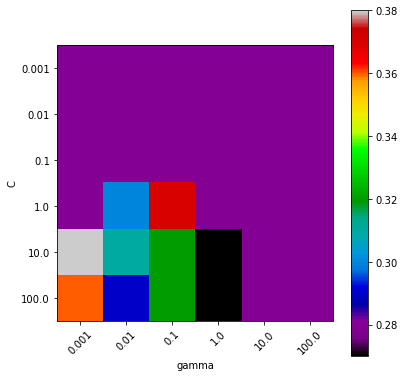

In [76]:
# We extract just the scores
scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))
# Make a nice figure
pl.figure(figsize=(6, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.colorbar()
pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
pl.yticks(np.arange(len(C_range)), C_range)
pl.show()